In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# A. Load the datasets

In [2]:
df = pd.read_csv('book_data.csv')
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


# B. Getting Basic Ideas

## 1. Finding Number of rows and columns

In [3]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

Dataset contains 54301 rows and 12 columns


## 2. Columns Decription

- __book_authors__: The author(s) of the book, separated by '|'
- __book_desc__: A description of the book, as found on the Goodreads web page of the book
- __book_edition__: Edition of the book
- __book_format__: Format of the book, i.e., hardcover, paperback, etc.
- __book_isbn__: ISBN of the book, if found on the Goodreads page
- __book_pages__: No. of pages
- __book_rating__: Average rating given by users
- __book_rating_count__: No. of ratings given by users
- __book_review_count__: No. of reviews given by users
- __book_title__: Name of the book
- __genres__: Genres that the book belongs to; This is user-provided information
- __image_url__: URL of the book cover image

### 3. Find null values

In [4]:
df.isnull().sum()

book_authors             0
book_desc             1331
book_edition         48848
book_format           1656
book_isbn            12866
book_pages            2522
book_rating              0
book_rating_count        0
book_review_count        0
book_title               0
genres                3242
image_url              683
dtype: int64

# C. Exploratory Data Analysis

## 1. Which are the books with most occurances in the list?

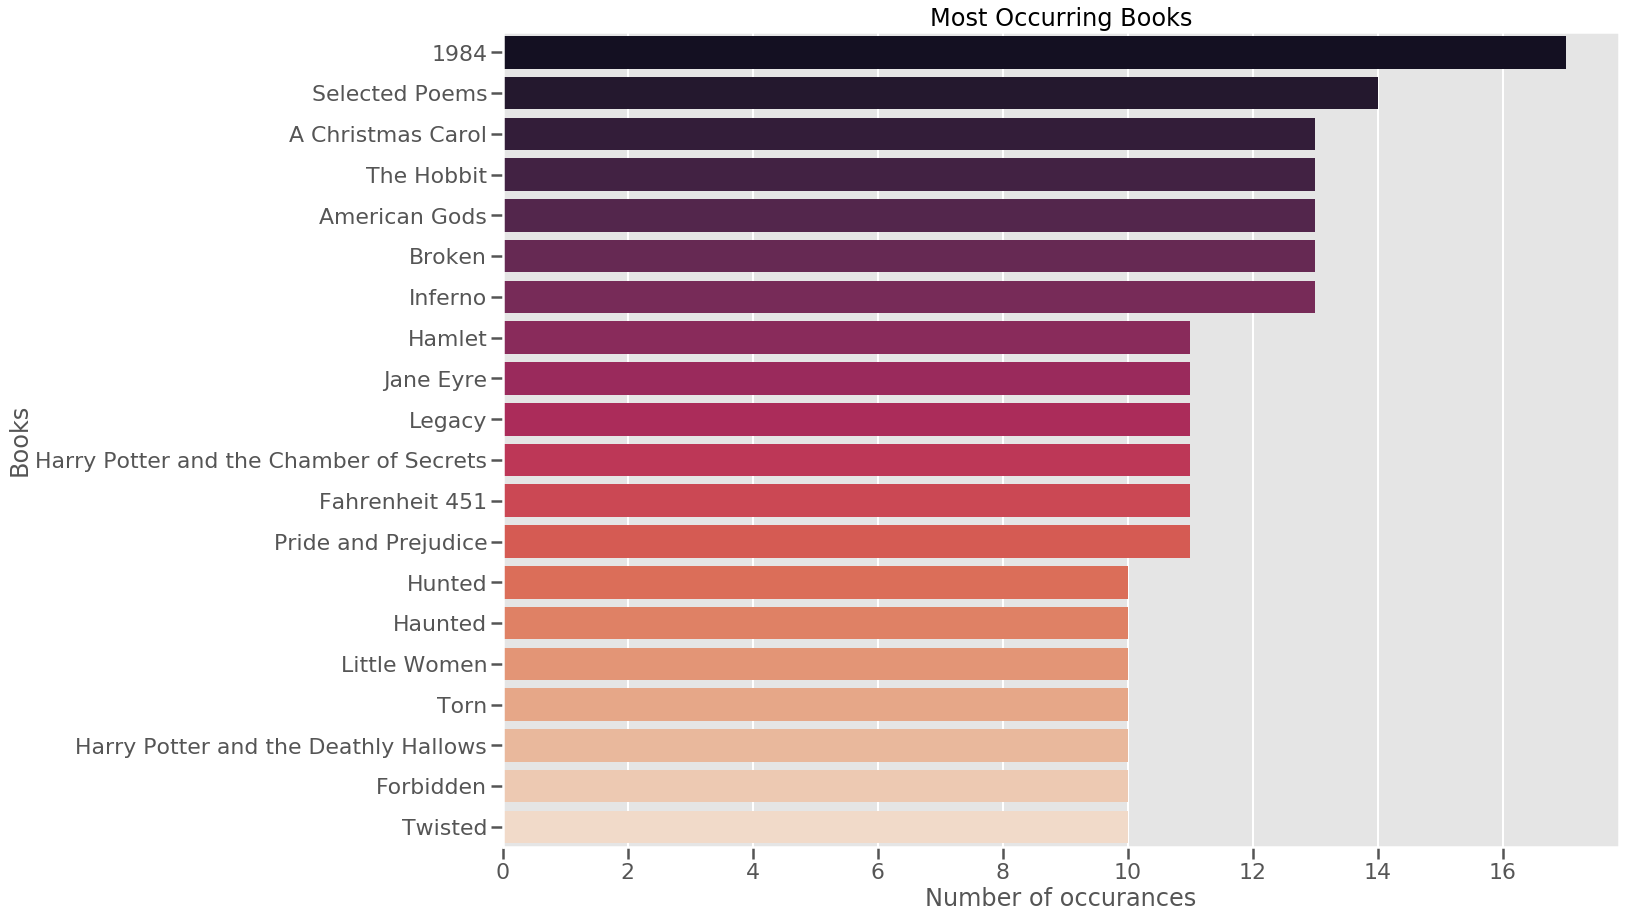

In [5]:
#Taking the first 20:

sb.set_context('poster')
plt.figure(figsize=(20,15))
books = df['book_title'].value_counts()[:20]
sb.barplot(x = books, y = books.index, palette='rocket')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

We can see that __1984__ have the most number of occurrances with the same name in the data. These books have come up in this database over and over again, with various publication editions.

## 2. Which are the top 10 most rated books?

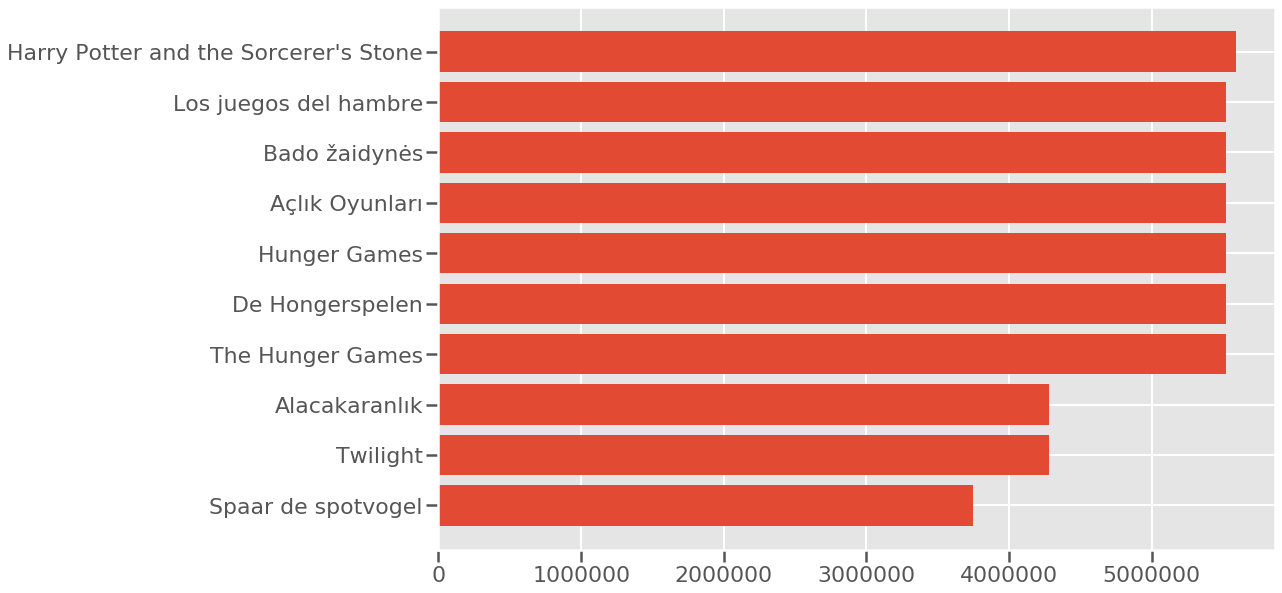

In [6]:
most_rated = df.sort_values('book_rating_count', ascending = False).head(14).set_index('book_title').sort_values(by=['book_rating_count'], ascending=True)
plt.figure(figsize=(15,10))
plt.barh(most_rated.index, most_rated['book_rating_count'], linewidth=10)
plt.show()

## 3. Which are the top 10 most reviewed books?

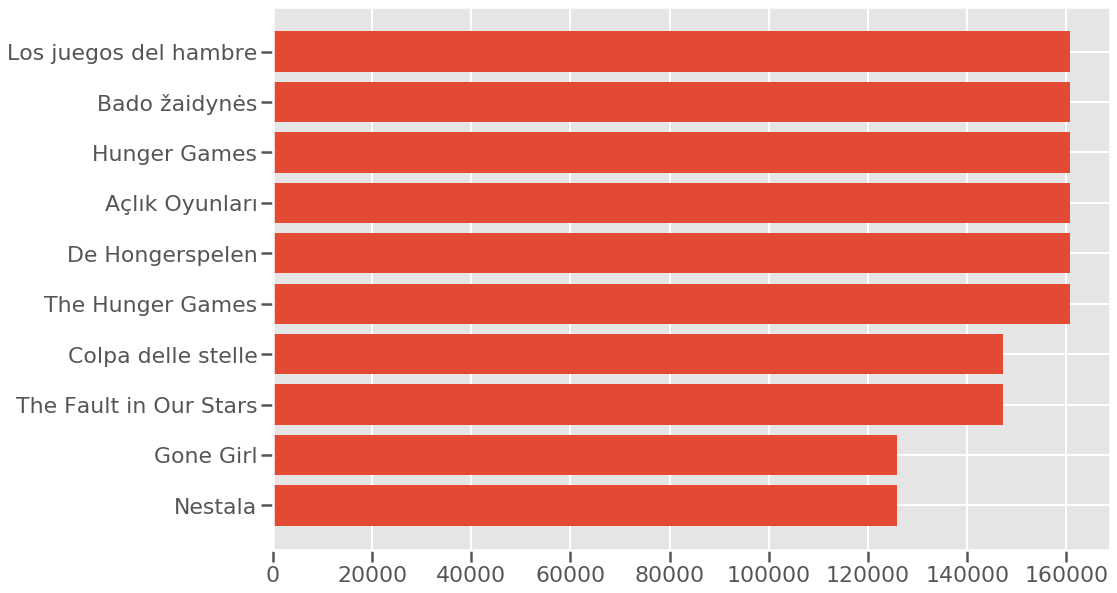

In [7]:
most_reviewed = df.sort_values('book_review_count', ascending = False).head(18).set_index('book_title').sort_values(by=['book_review_count'], ascending=True)
plt.figure(figsize=(15,10))
plt.barh(most_reviewed.index, most_reviewed['book_review_count'], linewidth=10)
plt.show()

### 4. What is the distribution for the book pages?

In [8]:
df = df.dropna(subset = ['book_pages'])
df['book_pages'] = df['book_pages'].str.replace(' pages', '')
df['book_pages'] = df['book_pages'].str.replace(' page', '')
df['book_pages'] = df['book_pages'].astype('int64')
df.dtypes

book_authors          object
book_desc             object
book_edition          object
book_format           object
book_isbn             object
book_pages             int64
book_rating          float64
book_rating_count      int64
book_review_count      int64
book_title            object
genres                object
image_url             object
dtype: object

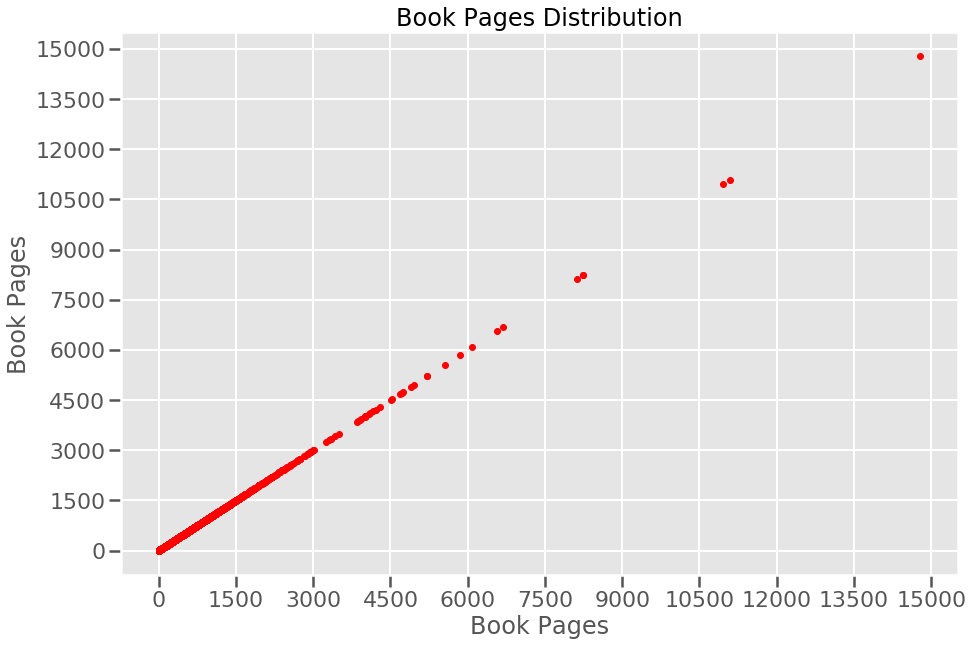

In [9]:
plt.figure(figsize=(15,10))
plt.plot(df['book_pages'], df['book_pages'], 'r.')
plt.xticks(np.arange(0, 15200, step=1500))
plt.yticks(np.arange(0, 15200, step=1500))
plt.xlabel('Book Pages')
plt.ylabel('Book Pages')
plt.title('Book Pages Distribution')
plt.show()

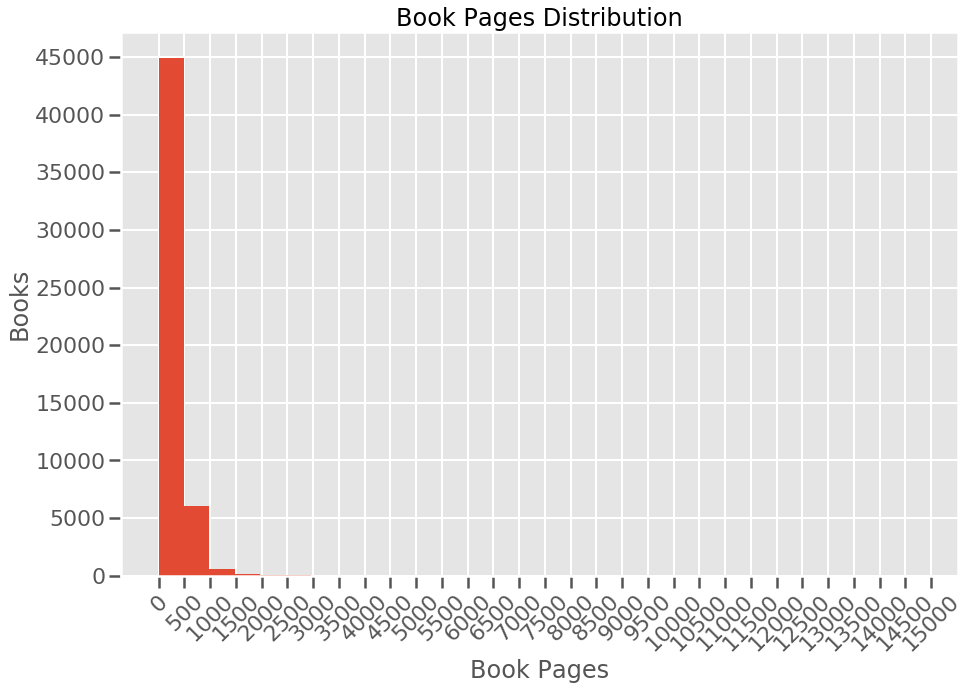

In [10]:
plt.figure(figsize=(15,10))
plt.hist(df['book_pages'], bins=30)
plt.xticks(np.arange(0, 15200, step=500), rotation=45)
plt.yticks(np.arange(0, 47000, step=5000))
plt.xlabel('Book Pages')
plt.ylabel('Books')
plt.title('Book Pages Distribution')
plt.show()

From the given plot, we can infer that:

- Majority of the book pages are between 0-500 pages, approximately.
- There are still around 10% of books which book pages are between 500-1000 pages
- Books having pages above 1500 pages are extremely rare

### 5. What is the rating distribution for the books?

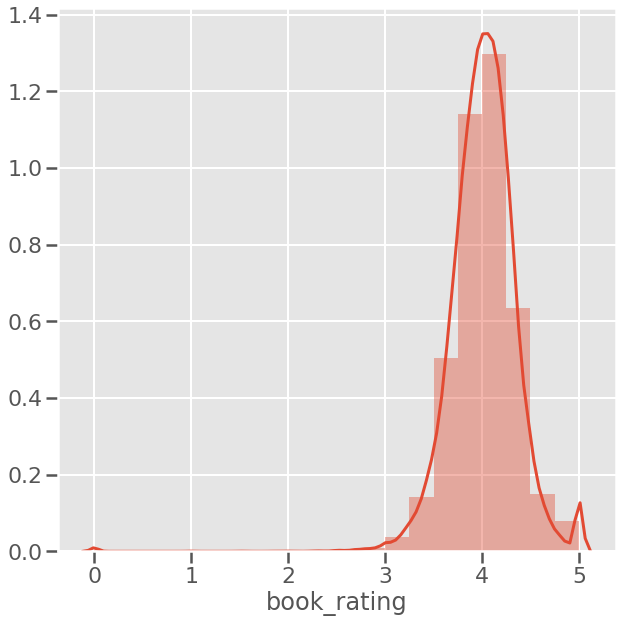

In [11]:
plt.figure(figsize=(10,10))
sb.distplot(df['book_rating'], bins=20)
plt.show()

From the given plot, we can infer that:

- Majority of the ratings is near 3.75-4.25, approximately.
- Books having scores below 3 are extremely rare

## 6. Which are the authors with most books?

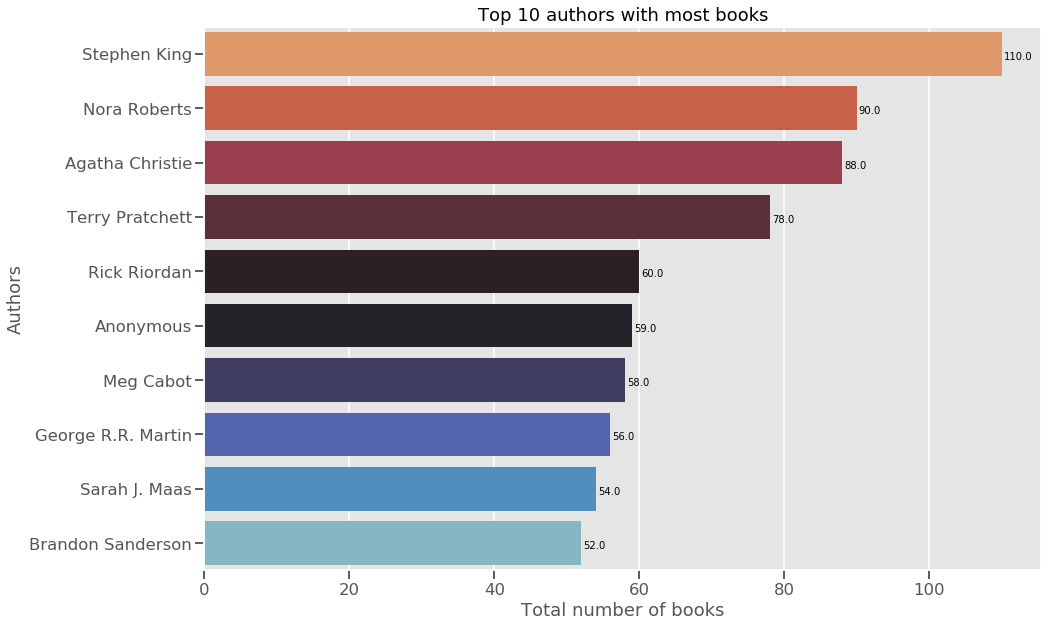

In [12]:
sb.set_context('talk')
most_books = df.groupby('book_authors')['book_title'].count().reset_index().sort_values('book_title', ascending=False).head(10).set_index('book_authors')
plt.figure(figsize=(15,10))
ax = sb.barplot(most_books['book_title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

We can see from the above plot that __Stephen Kings__ has the most number of books in the list. We also can see that there are some books which it's author is unknown.

Let's drop some books with Anonymous author.

In [13]:
df = df.drop(df[df['book_authors'] == 'Anonymous'].index)

### 7. Which are the top 10 highly rated authors?

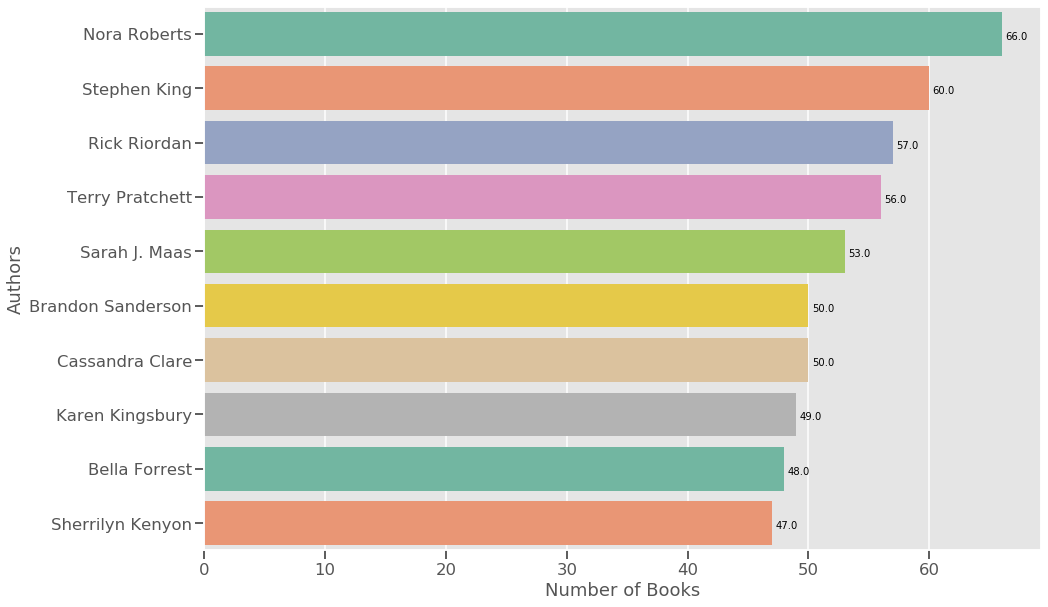

In [14]:
high_rated_author = df[df['book_rating']>=4]
high_rated_author = high_rated_author.groupby('book_authors')['book_title'].count().reset_index().sort_values('book_title', ascending = False).head(10).set_index('book_authors')
plt.figure(figsize=(15,10))
ax = sb.barplot(high_rated_author['book_title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

We can infer from the plot that __Nora Roberts__ has the highest ratings for her books

We can also infer that authors who have written the most books also got the most rating. Which mean they have their fanbase, people who love their books also love their other masterpiece.